<a href="https://colab.research.google.com/github/ML-Student1/Steven-Schaerer/blob/Machine-Learning/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Optimizer - implements backpropagation algorithm
# Gradient Descent
# Stochastic Gradient Descent 
# Mini-Batch Gradient Descent
# Momentum
# Nesterov Accelerated Gradient

In [1]:
#Imports
import tensorflow as tf
from tensorflow import keras
#Helper Libraries:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Dataset - Fashion Dataset MNIST, 60,000 images for training & 10,000 images for validation/testing "pixl data of clothing articles"
fashion_mnist = keras.datasets.fashion_mnist #load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #split into testing and training

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape #28 rows x 28 pixels or 784 pixels in total

(60000, 28, 28)

In [7]:
type(train_images) #type of dataframe

numpy.ndarray

In [8]:
train_images[0,23,23] #let's have a look at one pixel, image 0.  Gray scale value of pixel (0 black, 255 white)

194

In [11]:
train_labels[:10] #first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

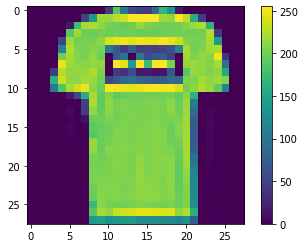

In [13]:
# Labels range from 0 - 9, with each integer representing a specific article of clothing.  Create an array of labels to indicate which is which:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

#Explore images

plt.figure() #make figure
plt.imshow(train_images[1]) #integer, relevant picture, show image
plt.colorbar() #colorgradient
plt.grid(False) #no grid
plt.show()

In [14]:
#Data Preprossesing - missing data, unknowns, etc.  Input values between 0 or -1 and 1...neural networks start with random weights/biases in between 0 and 1.  
# Big input values and tiny weights are a mismatch insofar as classification is concerned, reduce complexity by reducing scale, aka input values between -1 or 0 and 1.  Do for both, train & test
train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
# Building the Model - keras sequential model

model = keras.Sequential([ #sequential - basic neural network, pass info from left to right
                          keras.layers.Flatten(input_shape=(28, 28)), #input layer (1) - 784 neurons, 'flatten' layer (28 x 28) denotes input shape, each pixel associated with 1 neuron
                          keras.layers.Dense(128, activation='relu'), #hidden layer (2) - 'dense' denotes layer fully connected and each neuoron from prev layer to each neuron in this layer.
                          keras.layers.Dense(10, activation='softmax') #output layer (3) # 10 output neurons, activation softmax, 10 = output should have as many classes as inputs we're predicting for.
])

In [19]:
#Compile the model - define loss function, optimizer and metrics we would like to track.

model.compile(optimizer='adam', #algo for gradient descent
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # Output we want from network

#Training the model

model.fit(train_images, train_labels, epochs=10) #fit model to training data, labels & epochs. #accuracy on training data, not testing data.


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4979 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3764 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3349 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3101 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2931 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2684 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2492 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

In [20]:
#Evaluating the model - use builtin method from keras

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1) # verbose is, are we looking at output or not?  How much info are we seeing as model evaluates.  
print('Test accuracy:', test_acc) #overfit model vs train data.  Should generalize properly for new data.  Would need to change architecture, change epochs, etc. 'Hyperparameter tuning'

313/313 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.8821
Test accuracy: 0.882099986076355


In [27]:
#Making predictions - pass an array of data in the form we've specified in input layer to .predict() method

predictions = model.predict(test_images) #test_images array of images to predict on
print('Test accuracy:', test_acc)

Test accuracy: 0.882099986076355


In [30]:
predictions = model.predict(test_images)
print(predictions[0]) #prediction for test image 0, array, prob distribution calculated on output layer for image 0.

[3.1923530e-05 1.6756987e-10 4.1399694e-08 2.8523768e-08 6.9051787e-08
 5.3761160e-05 3.8154376e-05 1.5206653e-02 1.4674367e-04 9.8452270e-01]


In [32]:
predictions = model.predict(test_images)
print(np.argmax(predictions[0])) #argmax returns index of max value in list, least negative or 9.96699e-01.  Should return 9...should be ankle boot.

9


Pullover


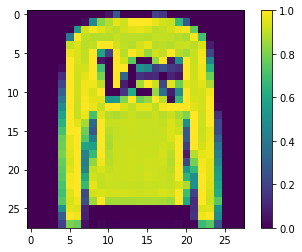

In [37]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[1])])
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 1


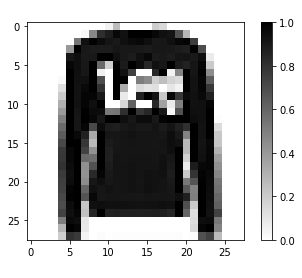

In [40]:
#Verifying predictions - verify predictions with simple visuals

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
      else:
        print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)